In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("gwas_main.csv")

In [23]:
df.head()

,SNPS,DISEASE/TRAIT,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,OR or BETA,MAPPED_GENE,LOCATION,RISK_ALLELE,Risk_score,risk_cluster,DISEASE/TRAIT_encoded,SNPS_encoded,MAPPED_GENE_encoded,RISK_ALLELE_encoded,interaction_OR_freq,polygenic_score
0,rs3104373,Multiple sclerosis,0.180851,1.000000e-234,234.000000,0.339288,HLA-DQA1,6,T,79.393368,Medium Risk,20,433,182,3,0.061361,79.393368
1,rs3135388,Multiple sclerosis,0.212766,4.000000e-225,224.397940,0.320935,HLA-DRA - HLA-DRB9,6,A,72.017105,Medium Risk,20,444,186,0,0.068284,72.017105
2,rs3129889,Multiple sclerosis,0.191489,1.000000e-206,206.000000,0.347853,HLA-DRA - HLA-DRB9,6,G,71.657653,Medium Risk,20,439,186,2,0.066610,71.657653
3,rs9271366,Multiple sclerosis,0.138298,7.000000e-184,183.154902,0.324605,HLA-DRB1 - HLA-DQA1,6,G,59.453072,Medium Risk,20,773,188,2,0.044892,59.453072
4,DRB*15:01,Multiple sclerosis,0.184397,1.000000e-132,132.000000,0.361312,DRB1,6,G,47.693136,Medium Risk,20,4,108,2,0.066625,47.693136


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SNPS                   944 non-null    object 
 1   DISEASE/TRAIT          944 non-null    object 
 2   RISK ALLELE FREQUENCY  944 non-null    float64
 3   P-VALUE                944 non-null    float64
 4   PVALUE_MLOG            944 non-null    float64
 5   OR or BETA             944 non-null    float64
 6   MAPPED_GENE            944 non-null    object 
 7   LOCATION               944 non-null    int64  
 8   RISK_ALLELE            944 non-null    object 
 9   Risk_score             944 non-null    float64
 10  risk_cluster           944 non-null    object 
 11  DISEASE/TRAIT_encoded  944 non-null    int64  
 12  SNPS_encoded           944 non-null    int64  
 13  MAPPED_GENE_encoded    944 non-null    int64  
 14  RISK_ALLELE_encoded    944 non-null    int64  
 15  intera

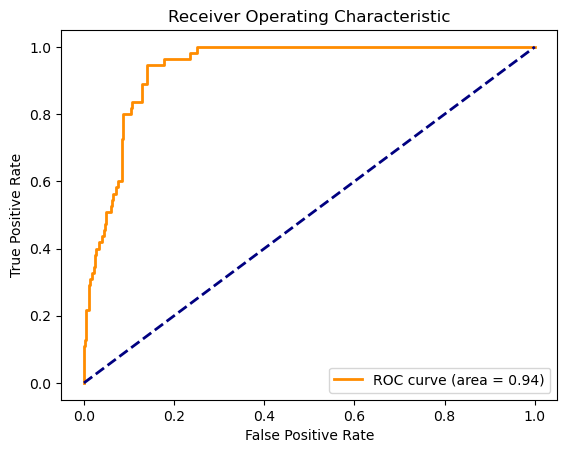

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Convert 'risk_cluster' to binary target
df['binary_target'] = (df['risk_cluster'] == 'Medium Risk').astype(int)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(df['binary_target'], df['Risk_score'])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [26]:
df["polygenic_score"].unique()

array([7.93933684e+01, 7.20171047e+01, 7.16576532e+01, 5.94530717e+01,
       4.76931359e+01, 1.82460842e+01, 9.20066967e+00, 9.93515439e+00,
       8.51989364e+00, 6.09794762e+00, 6.24519445e+00, 5.84194401e+00,
       5.93699299e+00, 5.21662399e+00, 5.87704611e+00, 4.58704004e-01,
       4.41050750e+00, 4.36260292e+00, 4.24834373e+00, 4.04019072e+00,
       4.10474329e+00, 4.03557870e+00, 3.96770419e+00, 1.46338002e+00,
       4.06431225e+00, 3.67951573e+00, 3.65961091e+00, 4.37726407e+00,
       3.62333933e+00, 3.68868071e+00, 3.49984870e+00, 3.44871094e+00,
       3.47686874e+00, 3.53174171e+00, 3.38870141e+00, 3.34530218e+00,
       3.31028873e+00, 8.23547010e-01, 3.36570607e+00, 3.20270038e+00,
       3.61385742e+00, 3.38162242e+00, 3.22256209e+00, 3.20621352e+00,
       3.04305793e+00, 9.98173228e+00, 8.42841397e+00, 2.99367220e+00,
       3.04040138e+00, 2.93081185e+00, 2.94236575e+00, 2.94530772e+00,
       2.99535495e+00, 2.96635829e+00, 2.86921948e+00, 2.70538835e+00,
      

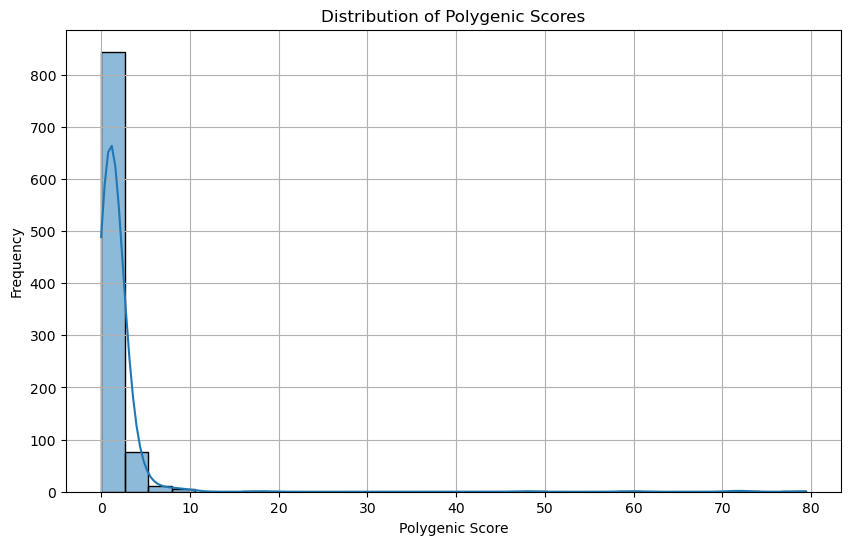

In [27]:
# Plotting the distribution of polygenic scores
plt.figure(figsize=(10, 6))
sns.histplot(df['polygenic_score'], bins=30, kde=True)
plt.title('Distribution of Polygenic Scores')
plt.xlabel('Polygenic Score')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [28]:
dff =  df[["SNPS","RISK ALLELE FREQUENCY","MAPPED_GENE","LOCATION","RISK_ALLELE"]]

In [29]:
#dff into new csv
dff.to_csv("gwas_snps.csv", index=False)

In [30]:
df["Risk_score"].describe()

count    944.000000
mean       1.748082
std        4.939612
min        0.000000
25%        0.733010
50%        1.000629
75%        1.659545
max       79.393368
Name: Risk_score, dtype: float64

In [31]:
df["DISEASE/TRAIT"].value_counts()

DISEASE/TRAIT
Multiple sclerosis                                                                                                                                  667
Rheumatoid arthritis or multiple sclerosis                                                                                                           53
Median relapse-independent longitudinal age-related multiple sclerosis severity score in relapse-onset multiple sclerosis                            23
Median relapse-independent longitudinal Multiple Sclerosis Severity Scale score in relapse-onset multiple sclerosis                                  19
Multiple sclerosis (OCB status)                                                                                                                      12
Multiple sclerosis (severity)                                                                                                                        12
Multiple sclerosis (age of onset)                                         